### Code untuk di Jupyter notebook

In [1]:
%cd D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [90 10]

D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [90 10]


In [2]:
%ls

 Volume in drive D is Data
 Volume Serial Number is BC6D-4CE5

 Directory of D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [90 10]

20/12/2021  20:40    <DIR>          .
20/12/2021  20:40    <DIR>          ..
19/12/2021  21:27           990.077 finalized_model.sav
27/12/2021  08:27    <DIR>          model
14/12/2021  15:41           962.074 model ok.joblib
14/12/2021  15:40           760.955 model.pkl
13/12/2021  15:34         1.076.328 model-93,8%-cnn-svm.h5
14/12/2021  18:44           953.912 model-95
14/12/2021  15:25           961.952 model-95,38%-cnn-svm [90 10].pkl
15/12/2021  07:11           961.954 model-95-2
19/12/2021  21:27           990.077 model-97.pkl
15/12/2021  07:12           961.954 model-97.sav
19/12/2021  21:32        24.377.117 model-97-12800-features.pkl
19/12/2021  21:22        24.377.117 model-97-flat
15/12/2021  08:15        25.298.916 model-97-flat.pkl
15/12/2021  08:15        25.298.916 model-97-flat.sav
19/12/2021  21:09        25.606.157 model-97

In [3]:
import os
# path di jupyter
base_dataset = 'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/'

In [4]:
# inisialisasi direktori data train dan validasi beserta data per kategori
dir1 = [r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/training/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/validation/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/testing/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/training/benign nevi/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/validation/benign nevi/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/testing/benign nevi/']

# SVM Classifier

In [5]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size)
    img_arr = (np.array(nimg))
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [6]:
%matplotlib inline
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten, Dropout 
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from PIL import Image

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import os

In [7]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]


In [8]:
from keras.models import Model
from keras.layers import Flatten, Dropout, Dense, Input, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

class FeatureExtractor:
    def __init__(self):
        inputs = Input(shape=(224,224,3))
      
        conv1 = Conv2D(32, kernel_size=3, strides = 1, activation='relu')(inputs)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        
        conv1 = Conv2D(64, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(128, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(256, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(512, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        flat = Flatten()(pool1)
        drop_out1 = Dropout(0.5)(flat)
        hidden1 = Dense(512,activation='relu', name='fc1')(drop_out1)

        self.model = Model(inputs=inputs, outputs=hidden1)
        

    def extract_features(self, img_path):
        im = Image.open(img_path)
        X = preprocess(im,(224,224))
        X = reshape([X])
        
        feat = self.model.predict(X)
        norm_feat = feat[0]/LA.norm(feat[0])
        return norm_feat

In [9]:
feats = []
names = []
dir_training = [dir1[0], dir1[3]]
model = FeatureExtractor()
for direktori in dir_training:
    img_list = get_imlist(direktori)
    for i, img_path in enumerate(img_list):
        norm_feat = model.extract_features(img_path)
        img_name = os.path.split(img_path)[1]
        feats.append(norm_feat)
        if 'AM' in img_name:
            names.append('acral melanoma')
        else:
            names.append('benign nevi')
        print("extracting feature from image No. %d , %d images in total" %((i+1), len(img_list)))

feats = np.array(feats)
names = np.array(names)

extracting feature from image No. 1 , 296 images in total
extracting feature from image No. 2 , 296 images in total
extracting feature from image No. 3 , 296 images in total
extracting feature from image No. 4 , 296 images in total
extracting feature from image No. 5 , 296 images in total
extracting feature from image No. 6 , 296 images in total
extracting feature from image No. 7 , 296 images in total
extracting feature from image No. 8 , 296 images in total
extracting feature from image No. 9 , 296 images in total
extracting feature from image No. 10 , 296 images in total
extracting feature from image No. 11 , 296 images in total
extracting feature from image No. 12 , 296 images in total
extracting feature from image No. 13 , 296 images in total
extracting feature from image No. 14 , 296 images in total
extracting feature from image No. 15 , 296 images in total
extracting feature from image No. 16 , 296 images in total
extracting feature from image No. 17 , 296 images in total
extrac

extracting feature from image No. 144 , 296 images in total
extracting feature from image No. 145 , 296 images in total
extracting feature from image No. 146 , 296 images in total
extracting feature from image No. 147 , 296 images in total
extracting feature from image No. 148 , 296 images in total
extracting feature from image No. 149 , 296 images in total
extracting feature from image No. 150 , 296 images in total
extracting feature from image No. 151 , 296 images in total
extracting feature from image No. 152 , 296 images in total
extracting feature from image No. 153 , 296 images in total
extracting feature from image No. 154 , 296 images in total
extracting feature from image No. 155 , 296 images in total
extracting feature from image No. 156 , 296 images in total
extracting feature from image No. 157 , 296 images in total
extracting feature from image No. 158 , 296 images in total
extracting feature from image No. 159 , 296 images in total
extracting feature from image No. 160 , 

extracting feature from image No. 283 , 296 images in total
extracting feature from image No. 284 , 296 images in total
extracting feature from image No. 285 , 296 images in total
extracting feature from image No. 286 , 296 images in total
extracting feature from image No. 287 , 296 images in total
extracting feature from image No. 288 , 296 images in total
extracting feature from image No. 289 , 296 images in total
extracting feature from image No. 290 , 296 images in total
extracting feature from image No. 291 , 296 images in total
extracting feature from image No. 292 , 296 images in total
extracting feature from image No. 293 , 296 images in total
extracting feature from image No. 294 , 296 images in total
extracting feature from image No. 295 , 296 images in total
extracting feature from image No. 296 , 296 images in total
extracting feature from image No. 1 , 239 images in total
extracting feature from image No. 2 , 239 images in total
extracting feature from image No. 3 , 239 im

extracting feature from image No. 127 , 239 images in total
extracting feature from image No. 128 , 239 images in total
extracting feature from image No. 129 , 239 images in total
extracting feature from image No. 130 , 239 images in total
extracting feature from image No. 131 , 239 images in total
extracting feature from image No. 132 , 239 images in total
extracting feature from image No. 133 , 239 images in total
extracting feature from image No. 134 , 239 images in total
extracting feature from image No. 135 , 239 images in total
extracting feature from image No. 136 , 239 images in total
extracting feature from image No. 137 , 239 images in total
extracting feature from image No. 138 , 239 images in total
extracting feature from image No. 139 , 239 images in total
extracting feature from image No. 140 , 239 images in total
extracting feature from image No. 141 , 239 images in total
extracting feature from image No. 142 , 239 images in total
extracting feature from image No. 143 , 

In [10]:
feats_test = []
names_test = []
dir_test = [dir1[2], dir1[5]]
for direktori in dir_test:
    img_list = get_imlist(direktori)
    for i, img_path in enumerate(img_list):
        norm_feat = model.extract_features(img_path)
        img_name = os.path.split(img_path)[1]
        feats_test.append(norm_feat)
        if 'AM' in img_name:
            names_test.append('acral melanoma')
        else:
            names_test.append('benign nevi')
        print("extracting feature from image No. %d , %d images in total" %((i+1), len(img_list)))

feats_test = np.array(feats_test)
names_test = np.array(names_test)

extracting feature from image No. 1 , 34 images in total
extracting feature from image No. 2 , 34 images in total
extracting feature from image No. 3 , 34 images in total
extracting feature from image No. 4 , 34 images in total
extracting feature from image No. 5 , 34 images in total
extracting feature from image No. 6 , 34 images in total
extracting feature from image No. 7 , 34 images in total
extracting feature from image No. 8 , 34 images in total
extracting feature from image No. 9 , 34 images in total
extracting feature from image No. 10 , 34 images in total
extracting feature from image No. 11 , 34 images in total
extracting feature from image No. 12 , 34 images in total
extracting feature from image No. 13 , 34 images in total
extracting feature from image No. 14 , 34 images in total
extracting feature from image No. 15 , 34 images in total
extracting feature from image No. 16 , 34 images in total
extracting feature from image No. 17 , 34 images in total
extracting feature from

In [11]:
from sklearn.preprocessing import LabelEncoder
x_train = feats
x_test= feats_test

lb = LabelEncoder()
y_train = lb.fit_transform(names)
y_test = lb.fit_transform(names_test)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

'''parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
              'C':[0.01,0.1,1, 10, 100, 1000],
              'gamma':[1e-1,1e-2,1e-3, 1e-4, 1e-5],
                'probability': [True]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(x_train, y_train)'''

svmclf = SVC(C=100, gamma=0.1, kernel='linear')
modelsvm = svmclf.fit(x_train, y_train)

In [13]:
svmclf

SVC(C=100, gamma=0.1, kernel='linear')

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_testSVM = modelsvm.predict(x_test)

labels = (y_testSVM > 0.5).astype(int)
target_names = ['acral melanoma', 'benign nevi']
print(classification_report(y_test, labels, target_names=target_names))

print('Confusion Matrix')
print(confusion_matrix(y_test, labels))
print('acc score : ', modelsvm.score(x_test,y_test))

                precision    recall  f1-score   support

acral melanoma       0.91      0.91      0.91        34
   benign nevi       0.90      0.90      0.90        31

      accuracy                           0.91        65
     macro avg       0.91      0.91      0.91        65
  weighted avg       0.91      0.91      0.91        65

Confusion Matrix
[[31  3]
 [ 3 28]]
acc score :  0.9076923076923077


C:\Users\Fadhlan\Anaconda3\envs\tf2.6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


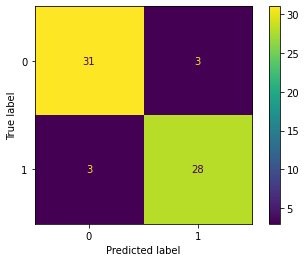

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelsvm, x_test, y_test)  
plt.savefig('D:/SEMESTER 7/Pembelajaran Mesin/features/Skenario 6/cm-skenario-6.svg')
plt.show()

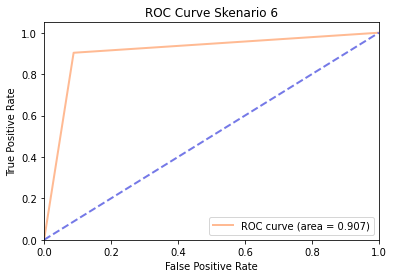

In [16]:
from sklearn.metrics import  precision_recall_curve, auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, labels)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#ffba93',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#7579e7', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Skenario 6')
plt.legend(loc="lower right")
plt.savefig('D:/SEMESTER 7/Pembelajaran Mesin/features/Skenario 6/roc-curve-skenario-6.svg')
plt.show()